# NLP Fundamentals

Contents:

- Preparing Text for NLP
    - Regular Expressions (regex)
    - Tokenization
    - Preprocessing Text
        - lowercasing
        - Removing Unwanted Tokens or Stopwords
        - Lemmisation
- Topic Identification
    - Bag-of-Words
        - Counter
        - gensim
    - Tf-idf
- Named Entity Recognition
    - NER with NLTK
    - NER with SpaCy
    - NER with polyglot


In [10]:
# Import necessary modules

import re

import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger') # NER
# nltk.download('maxent_ne_chunker') # NER
# nltk.download('words') # NER
# nltk.download('tagsets') #NER to see the tags available

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import regexp_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer

from gensim.models.tfidfmodel import TfidfModel

import spacy

import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter, defaultdict

from itertools import chain

## Preparing Text for NLP

### Regex

A _Regular Expression_ is a sequence of characters or a string containing a combination of normal (or regular, ordinary) characters and special metacharacters that define search patterns to find text or positions within a text. While normal characters have literal meaning and match themselves, metacharacters have special meaning and they resresent types of characters, such as `\d` for digits or `\w` for words, or ideas/repetitions.

>Regular expressions use the backslash character ('\') to indicate special forms or to allow special characters to be used without invoking their special meaning. This collides with Python’s usage of the same character for the same purpose in string literals. The solution is to use Python’s raw string notation for regular expression patterns; backslashes are not handled in any special way in a string literal prefixed with `'r'`. So `r"\n"` is a two-character string containing `'\'` and `'n'`, while `"\n"` is a one-character string containing a newline. Usually patterns will be expressed in Python code using this raw string notation. [source](https://docs.python.org/3/library/re.html)

Some of the special characters are shown in below tables.

Metacharacter|Description
---|:---
`.` | Wildcard - Matches any single character except \n.Matches any single character except `\n`
`^` | Matches the start of the string
`$` | Matches the end of the string or just before the newline at the end of the string
`\|` | The OR (choice) operator matches either the expression before or the expression after the operator. For example, `abc\|def` matches "abc" or "def".

**Repetition Quantifiers:**

Metacharacter|Description
---|:---
`*` | Matches the preceding element 0 or more times. `ab*` will match ‘a’, ‘ab’, or ‘a’ followed by any number of ‘b’s
`+` | Matches the preceding element 1 or more times. `ab+` will match ‘a’ followed by any non-zero number of ‘b’s; it will not match just ‘a’
`?` | Causes the resulting RE to match 0 or 1 repetitions of the preceding RE. `ab?` will match either ‘a’ or ‘ab’.
`{m,n}` | Matches the preceding element at least m and not more than n times. For example, `a{3,5}` | Matches only "aaa", "aaaa", and "aaaaa"

**Special Sequences:**

Metacharacter|Description
---|:---
`\w` | Matches alphanumeric characters, which means a-z, A-Z, and 0-9. It also matches the underscore, _.
`\d` | Matches digits, which means 0-9.
`\s` | Matches whitespace characters, which include the \t, \n, \r, and space characters.
`\b` | Matches the boundary (or empty string) at the start and end of a word, that is, between \w and \W.
`\A` | Matches the beginning of a string (but not an internal line).
`\z` | Matches the end of a string (but not an internal line).

**Ranges (Set of Characters):**

Metacharacter|Description
---|:---
`[ ]` | Used to indicate a set of characters. Matches a single character that is contained within the brackets
`[amk]` | Matches either a, m, or k. It does not match `amk`
`[a-z]` | Matches any alphabet from `a` to `z`
`[a\-z]` | Matches a, -, or z. It matches `-` because `\` escapes it
`[a-cx-z]` | Matches a, b, c, x, y, z
`[0-5][0-9]` | Matches all the two-digits numbers from 00 to 59
`[a-]` | Matches a or -, because `-` is not being used to indicate a series of characters
`[-a]` | As above, matches a or -
`[a-z0-9]` | Matches characters from a to z and also from 0 to 9
`[(+*)]` | Special characters become literal inside a set, so this matches (, +, *, and )
`[^ab2]` | Adding ^ excludes any character in the set. Here, it matches characters that are not a, b, or 2

**Groups:**

Metacharacter|Description
---|:---
`( )` | Matches the expression inside the parentheses and groups it. Groups a series of pattern elements to a single element.
`(? )` | Inside parentheses like this, ? acts as an extension notation. Its meaning depends on the character immediately to its right.

In [11]:
my_string = "STRING: There are several sentence endings. One is Period. Another one is Question Mark? Other one is Exclamation Mark! [#Regex is great]"

# Split my_string on sentence endings and print the result
sentence_endings = r"[.?!]"
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

['STRING: There are several sentence endings', ' One is Period', ' Another one is Question Mark', ' Other one is Exclamation Mark', ' [#Regex is great]']
['STRING', 'There', 'One', 'Period', 'Another', 'Question', 'Mark', 'Other', 'Exclamation', 'Mark', 'Regex']
['STRING:', 'There', 'are', 'several', 'sentence', 'endings.', 'One', 'is', 'Period.', 'Another', 'one', 'is', 'Question', 'Mark?', 'Other', 'one', 'is', 'Exclamation', 'Mark!', '[#Regex', 'is', 'great]']
[]


In [12]:
# Search for the first occurrence of "one" in my_string
match = re.search("one", my_string)

# Print the start and end indexes of match
print(match.start(), match.end())

# Write a regular expression to search for anything in square brackets
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, my_string))

# Find the script notation at the beginning and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, my_string))

67 70
<re.Match object; span=(120, 137), match='[#Regex is great]'>
<re.Match object; span=(0, 7), match='STRING:'>


### Tokenization

Natural Language Toolkit (NLTK) is a platform for building Python programs to work with human language data.

In [13]:
#from nltk.tokenize import sent_tokenize, word_tokenize

# Split scene_one into sentences
sentences = sent_tokenize(my_string)

# Print the sentences
print(sentences)

# Use word_tokenize to tokenize the fourth sentence
tokenized_sent = word_tokenize(sentences[3])

# Print the tokenized sentence
print(tokenized_sent)

# Make a set of unique tokens in the entire scene
unique_tokens = set(word_tokenize(my_string))

# Print the unique tokens result
print(unique_tokens)


['STRING: There are several sentence endings.', 'One is Period.', 'Another one is Question Mark?', 'Other one is Exclamation Mark!', '[#Regex is great]']
['Other', 'one', 'is', 'Exclamation', 'Mark', '!']
{'[', '#', 'one', ']', '.', 'STRING', 'great', 'There', ':', 'are', 'is', 'several', 'sentence', 'endings', '!', 'Period', '?', 'Other', 'Question', 'Mark', 'One', 'Exclamation', 'Regex', 'Another'}


In [14]:
# Tokenizer pattern which retains sentence punctuation as seperate tokens. #... remains single token
pattern3 = r"(\w+|#\w+|\?|!|\.)"

print(re.match(pattern3, my_string))

print(re.findall(pattern3, my_string))

<re.Match object; span=(0, 6), match='STRING'>
['STRING', 'There', 'are', 'several', 'sentence', 'endings', '.', 'One', 'is', 'Period', '.', 'Another', 'one', 'is', 'Question', 'Mark', '?', 'Other', 'one', 'is', 'Exclamation', 'Mark', '!', '#Regex', 'is', 'great']


In [15]:
# Tokenizer pattern which retains sentence punctuation as seperate tokens. #. remains single token
pattern3 = r"(\w+|#\w+|\?|!|\.)"

# Tokenize with the pattern
regexp_tokenize(my_string, pattern3)

['STRING',
 'There',
 'are',
 'several',
 'sentence',
 'endings',
 '.',
 'One',
 'is',
 'Period',
 '.',
 'Another',
 'one',
 'is',
 'Question',
 'Mark',
 '?',
 'Other',
 'one',
 'is',
 'Exclamation',
 'Mark',
 '!',
 '#Regex',
 'is',
 'great']

In [16]:
# Regex with NLTK tokenization

tweets = ["Data Science with #python and #rstat @DS now!",
         "Natural Language Processing #NLP with NLTK"]

# Define a regex pattern to find hashtags
pattern4 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0], pattern4)

['#python', '#rstat']

In [17]:
# Write a pattern that matches both mentions and hashtags
pattern5 = r"([@#]\w+)"

# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[1], pattern5)

['#NLP']

In [18]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['Data', 'Science', 'with', '#python', 'and', '#rstat', '@DS', 'now', '!'], ['Natural', 'Language', 'Processing', '#NLP', 'with', 'NLTK']]


Unicode ranges for emoji are:

`('\U0001F300'-'\U0001F5FF')`, `('\U0001F600-\U0001F64F')`, `('\U0001F680-\U0001F6FF')`, and `('\u2600'-\u26FF-\u2700-\u27BF')`.

In [19]:
# Non-ascii tokenization

turkish_text = "Yemeğe gidiyorum? 🍕 İşin var mı? 🚕"

# Tokenize and print all words in german_text
all_words = word_tokenize(turkish_text)
print(all_words)

# Tokenize and print only capital words including the non-ASCII characters
capital_words = r"[A-Zİ]\w+"
print(regexp_tokenize(turkish_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(turkish_text, emoji))

['Yemeğe', 'gidiyorum', '?', '🍕', 'İşin', 'var', 'mı', '?', '🚕']
['Yemeğe', 'İşin']
['🍕', '🚕']


In [20]:
with open('my_string_long.txt') as file:
    my_string_long = file.read()

# Split the script into lines
lines = my_string_long.split('\n')

# Tokenize each line
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]
print(tokenized_lines)

[[], ['In', 'the', 'past', 'two', 'decades', 'there', 'has', 'been', 'a', 'significant', 'shift', 'in', 'naval', 'missions', 'toward', 'operations', 'other', 'than', 'war'], ['Maritime', 'security', 'operations', 'such', 'as', 'counter', 'piracy', 'maritime', 'interdiction', 'maritime', 'patrol', 'and', 'naval', 'escort', 'are', 'the', 'main', 'focus', 'of', 'most', 'fleets', 'today', 'however', 'the', 'vessels', 'that', 'are', 'currently', 'being', 'used', 'in', 'such', 'operations', 'were', 'mainly', 'built', 'for', 'other', 'purposes'], ['For', 'instance', 'in', 'August', '2009', 'the', 'North', 'Atlantic', 'Council', 'approved', 'Operation', 'Ocean', 'Shield', 'to', 'fight', 'piracy', 'in', 'the', 'Gulf', 'of', 'Aden'], ['Among', 'ships', 'that', 'were', 'assigned', 'in', 'the', 'rotations', 'of', 'this', 'NATO', 'mission', 'many', 'were', 'destroyers', 'and', 'frigates'], ['Although', 'those', 'warships', 'can', 'be', 'used', 'in', 'such', 'missions', 'how', 'reasonable', 'is', 'i

[0, 19, 39, 21, 17, 27, 5, 33, 38, 59, 0]


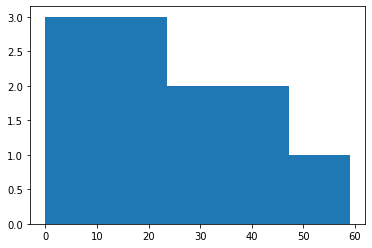

In [21]:
# Make a frequency list of lengths
line_num_words = [len(t_line) for t_line in tokenized_lines]
print(line_num_words)

# Plot a histogram of the line lengths
plt.hist(line_num_words, bins=5)

# Show the plot
plt.show()

### Preprocessing Text

You'll need to lower, remove stop words and non-alphabetic characters, lemmatize, and perform a new bag-of-words on your cleaned text.

#### lowercasing

In [22]:
# Tokenize the article
tokens = word_tokenize(my_string)

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in tokens]

print(my_string)
print(lower_tokens)

STRING: There are several sentence endings. One is Period. Another one is Question Mark? Other one is Exclamation Mark! [#Regex is great]
['string', ':', 'there', 'are', 'several', 'sentence', 'endings', '.', 'one', 'is', 'period', '.', 'another', 'one', 'is', 'question', 'mark', '?', 'other', 'one', 'is', 'exclamation', 'mark', '!', '[', '#', 'regex', 'is', 'great', ']']


In [23]:
# Tokenize the article
tokens = word_tokenize(my_string_long)

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in tokens]

#### Removing Unwanted Tokens

In [24]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
# Some English stops (not all of them!)
english_stops = ['a', 'in', 'and', 'the', 'there', 'is', 'been', 'or', 
                 'has', 'are', 'one', 'is', 'other', 'this', 'these',
                'those', 'that', 'of', 'an', 'it', 'to', 'for', 'be', 'on',
                'such', 'were', 'they', 'their', 'as', 'has', 'vs', 'with',
                'most', 'although', 'can', 'than']

# Retain alphabetic words
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

#### Lemmatisation

Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form. (In English, for example, run, runs, ran and running are forms of the same lexeme, with "run" as the lemma.)

In [26]:
# Import WordNetLemmatizer
# from nltk.stem import WordNetLemmatizer

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

print(lemmatized)

['past', 'two', 'decade', 'significant', 'shift', 'naval', 'mission', 'toward', 'operation', 'war', 'maritime', 'security', 'operation', 'maritime', 'interdiction', 'maritime', 'patrol', 'naval', 'escort', 'main', 'focus', 'fleet', 'today', 'however', 'vessel', 'currently', 'being', 'used', 'operation', 'mainly', 'built', 'purpose', 'instance', 'august', 'north', 'atlantic', 'council', 'approved', 'operation', 'ocean', 'shield', 'fight', 'piracy', 'gulf', 'aden', 'among', 'ship', 'assigned', 'rotation', 'nato', 'mission', 'many', 'destroyer', 'frigate', 'warship', 'used', 'mission', 'how', 'reasonable', 'risk', 'destroyer', 'frigate', 'fight', 'terrorist', 'boat', 'pirate', 'capable', 'warship', 'smaller', 'combatant', 'many', 'surface', 'vessel', 'perform', 'maritime', 'security', 'operation', 'nato', 'task', 'force', 'example', 'sophisticated', 'warship', 'capable', 'warfare', 'asuw', 'warfare', 'aaw', 'warfare', 'asw', 'sophisticated', 'capable', 'fleet', 'able', 'achieve', 'good', 

## Topic Identification

### Bag-of-Words

Bag-of-words model can be used to represent the text as the bag of its words. It is mainly used as a tool of feature generation. One of the main properties of the bag-of-words model is that it completely ignores the order of the tokens in the document that is encoded, which is where the name bag-of-words comes from.

#### Bag-of-words Using `Counter`

In [27]:
# from collections import Counter

# Tokenize the article
tokens = word_tokenize(my_string_long)

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens of the raw text
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 16), ('in', 13), ('the', 9), ('of', 9), ('.', 8), ('a', 7), ('to', 7), ('and', 6), ('that', 6), ('are', 5)]


In [28]:
# Create the bag-of-words of the lemmatized text
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('operation', 5), ('capable', 5), ('maritime', 4), ('vessel', 4), ('used', 4), ('ship', 4), ('warfare', 4), ('mission', 3), ('warship', 3), ('naval', 2)]


#### Bag-of-words Using `gensim`

Word vectors are multi-dimensional mathematical representations of words created using _deep learning_ methods. They give us insight into relationships between words in a corpus. We can create and query a corpus with `gensim` module.

Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.

Check [gensim](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/gensim%20Quick%20Start.ipynb) for details.

In [29]:
import os

path = "raw-corpus/"
files = os.listdir(path)

raw_corpus = []

# Import text files to generate raw corpus
for file in files:
    if file.endswith(".txt"):
        with open(path + file, 'r') as f:
            raw_corpus.append(f.read())

In [30]:
# Preprocessing text (simple)

# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in english_stops]
         for document in raw_corpus]

Before proceeding, we want to associate each word in the corpus with a *unique integer ID*. We can do this using the `gensim.corpora.Dictionary` class. This dictionary defines the vocabulary of all words that our processing knows about.

In [31]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles
dictionary = Dictionary(texts)

print(dictionary)

Dictionary(218 unique tokens: ['analysis', 'cleansing,', 'conclusions', 'data', 'decision-making.']...)


In [32]:
len(dictionary)

218

Our processed corpus has n=218 unique words in it, which means that each document will be represented by a n-dimensional vector under the bag-of-words model. We can use the dictionary to turn tokenized documents into these n-dimensional vectors. We can see what these IDs correspond to:

In [33]:
print(dictionary.token2id)

{'analysis': 0, 'cleansing,': 1, 'conclusions': 2, 'data': 3, 'decision-making.': 4, 'discovering': 5, 'goal': 6, 'information,': 7, 'informing': 8, 'inspecting,': 9, 'modeling': 10, 'process': 11, 'supporting': 12, 'transforming': 13, 'useful': 14, '0': 15, '1': 16, '1,': 17, 'between': 18, 'certainty.': 19, 'events': 20, 'glossary': 21, 'impossibility': 22, 'indicates': 23, 'likelihood': 24, 'measure': 25, 'number': 26, 'occur.': 27, 'probability': 28, 'quantifies': 29, 'quantifying': 30, 'see': 31, 'sparsly': 32, 'speaking,': 33, 'statistics.': 34, 'where,': 35, 'will': 36, '"a': 37, '"can': 38, '"computing': 39, '"training': 40, '(as': 41, '1959': 42, '====': 43, 'across': 44, 'alan': 45, 'algorithm': 46, 'algorithms': 47, 'also': 48, 'analytics.': 49, 'application': 50, 'applications,': 51, 'arthur': 52, 'artificial': 53, 'at': 54, 'based': 55, 'being': 56, 'build': 57, 'business': 58, 'by': 59, 'characteristics': 60, 'class': 61, 'closely': 62, 'cognitive': 63, 'coined': 64, 'com

In [34]:
# Select the id for "data"
data_id = dictionary.token2id.get("data")

print("id:", data_id)

# Use data_id with the dictionary to print the word
print("word: ", dictionary.get(data_id))

id: 3
word:  data


We can create the bag-of-word representation for a document using the `doc2bow` method of the dictionary, which returns a sparse representation of the word counts. The first entry in each tuple corresponds to the ID of the token in the dictionary, the second corresponds to the count of this token. 

`Dictionary.doc2bow`: Convert `document` into the bag-of-words (BoW) format = list of `(token_id, token_count)` tuples.

Now, we can convert our entire original corpus to a list of vectors.

In [35]:
# Create a MmCorpus (MatrixMarket format)
bow_corpus = [dictionary.doc2bow(text) for text in texts]

# Print the first 10 word ids with their frequency counts from the fourth document
print(bow_corpus[3][:10])

[(3, 1), (127, 1), (166, 2), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 1)]


In [36]:
# Number of documents (texts)
len(bow_corpus)

4

We can even vectorize a phrase, "Data is everywhere", which was not in our original corpus. Note that the word "everywhere" did not occur in the original corpus and so it was not included in the vectorization.

In [37]:
new_text = "Data is everywhere"

# Create the bag-of-word representation for the new_text using the doc2bow method of the dictionary
new_vec = dictionary.doc2bow(new_text.lower().split())

# Print the new_vec
new_vec

[(3, 1)]

In [38]:
# Save the fourth document
doc = bow_corpus[3]

# Sort the doc for frequency
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

print(bow_doc)

[(166, 2), (215, 2), (3, 1), (127, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 1), (207, 1), (208, 1), (209, 1), (210, 1), (211, 1), (212, 1), (213, 1), (214, 1), (216, 1), (217, 1)]


In [39]:
# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

statistical 2
statistics 2
data 1
model 1
analysis, 1


In [40]:
# Create the defaultdict
total_word_count = defaultdict(int)
for word_id, word_count in chain.from_iterable(bow_corpus): #itertools.chain
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

machine 11
learning 8
data 5
algorithms 4
probability 3


### Tf-idf

Vectorized corpus can be transformed using models. The tf-idf model transforms vectors from the bag-of-words representation to a vector space where the frequency counts are weighted according to the relative rarity of each word in the corpus.

> In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.
In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.[ref](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

We can now determine new significant terms for the corpus by applying gensim's tf-idf. 

In [41]:
# Import TfidfModel
# from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the bow_corpus (Train the model)
tfidf = TfidfModel(bow_corpus)

# Calculate the tfidf weights of doc
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

[(3, 0.043951374386869975), (127, 0.10589735737912483), (166, 0.21179471475824965), (200, 0.21179471475824965), (201, 0.21179471475824965)]


In [42]:
# Sort the weights from highest to lowest
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

statistics 0.4235894295164993
statistical 0.21179471475824965
analysis, 0.21179471475824965
applying 0.21179471475824965
begin 0.21179471475824965


The tfidf model returns a list of tuples, where the first entry is the token ID and the second entry is the tf-idf weighting.

In [43]:
# Transform the "Data analysis and machine learning" string
tfidf[dictionary.doc2bow("Data analysis and machine learning".lower().split())]

[(0, 0.33018847715162497),
 (3, 0.13704059984770006),
 (113, 0.6603769543032499),
 (117, 0.6603769543032499)]

## Named Entity Recognition (NER)

Named entity recognition is an information extraction process that seeks to locate and classify named entities in text into pre-defined categories answering the questions who, what, where, when etc. These categories include names, organizations, locations, quantities, percentages, etc. NER can help answering  real-world questions, such as:
- Which politicians were mentioned in the news article?
- Were specified products mentioned in complaints or reviews?
- Does the tweet contain the name of an organization or a person? Does the tweet also contains location information?

### NER with NLTK

In [44]:
with open("articles/article-data-science.txt", 'r') as file:
    article = file.read()

# Tokenize the article into sentences
sentences = nltk.sent_tokenize(article)

print("Sentences:\n", sentences)

# Tokenize each sentence into words
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

print("\nTokens:\n", token_sentences)

Sentences:
 ['Data science (From Wikipedia)\n\nData science is a multi-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data.', 'Data science is the same concept as data mining and big data: "use the most powerful hardware, the most powerful programming systems, and the most efficient algorithms to solve problems".', 'Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data.', 'It employs techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, and information science.', 'Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and

In [45]:
# Tag each tokenized sentence into parts of speech
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

print("\nParts of Speech:\n", pos_sentences)

# Create the named entity chunks
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

print("\nNamed Entity Chunks:\n", chunked_sentences)


Parts of Speech:
 [[('Data', 'NNS'), ('science', 'NN'), ('(', '('), ('From', 'IN'), ('Wikipedia', 'NNP'), (')', ')'), ('Data', 'NNP'), ('science', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('multi-disciplinary', 'JJ'), ('field', 'NN'), ('that', 'WDT'), ('uses', 'VBZ'), ('scientific', 'JJ'), ('methods', 'NNS'), (',', ','), ('processes', 'NNS'), (',', ','), ('algorithms', 'NN'), ('and', 'CC'), ('systems', 'NNS'), ('to', 'TO'), ('extract', 'VB'), ('knowledge', 'NN'), ('and', 'CC'), ('insights', 'NNS'), ('from', 'IN'), ('structured', 'VBN'), ('and', 'CC'), ('unstructured', 'JJ'), ('data', 'NNS'), ('.', '.')], [('Data', 'NNP'), ('science', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('same', 'JJ'), ('concept', 'NN'), ('as', 'IN'), ('data', 'NNS'), ('mining', 'NN'), ('and', 'CC'), ('big', 'JJ'), ('data', 'NNS'), (':', ':'), ('``', '``'), ('use', 'IN'), ('the', 'DT'), ('most', 'RBS'), ('powerful', 'JJ'), ('hardware', 'NN'), (',', ','), ('the', 'DT'), ('most', 'RBS'), ('powerful', 'JJ'), ('programming', 'V

In [46]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [47]:
# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        # Determine if each chunk has a 'label'
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Wikipedia/NNP)
(NE Data/NNP)
(NE Data/NNP)
(NE Jim/NNP Gray/NNP)
(NE American/NNP Statistical/NNP Association/NNP)
(NE Harvard/NNP Business/NNP Review/NNP)
(NE Sexiest/NNP Job/NNP)
(NE Century/NNP)
(NE Nate/NNP Silver/NNP)


In [48]:
with open("articles/article-AI.txt", 'r') as file:
    article = file.read()

# Tokenize the article into sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        # Determine if each chunk has a 'label'
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Artificial/JJ)
(NE Tesler/NNP)
(NE Modern/JJ)
(NE Artificial/JJ)
(NE Analytical/JJ AI/NNP)
(NE Humanized/NNP AI/NNP)
(NE Artificial/JJ)
(NE AI/NNP)
(NE AI/NNP)
(NE Approaches/NNP)
(NE AI/NNP)
(NE AI/NNP)
(NE History/NNP)
(NE Mary/NNP Shelley/NNP)
(NE Karel/NNP Čapek/NNP)
(NE Rossum/NNP)
(NE Universal/NNP Robots/NNP)
(NE Alan/NNP Turing/NNP)
(NE AI/NNP)
(NE McCullouch/NNP)
(NE Pitts/NNP)
(NE AI/NNP)
(NE Dartmouth/NNP College/NNP)
(NE CMU/NNP)
(NE Herbert/NNP Simon/NNP)
(NE CMU/NNP)
(NE John/NNP McCarthy/NNP)
(NE MIT/NNP)
(NE Marvin/NNP Minsky/NNP)
(NE MIT/NNP)
(NE Arthur/NNP Samuel/NNP)
(NE IBM/NNP)
(NE AI/NNP)
(NE Logic/NNP Theorist/NNP)
(NE English/NNP)
(NE U.S./NNP)
(NE Defense/NNP)
(NE AI/NNP)
(NE Herbert/NNP Simon/NNP)
(NE Marvin/NNP Minsky/NNP)
(NE Progress/NN)
(NE Sir/NNP James/NNP Lighthill/NNP)
(NE US/NNP Congress/NNP)
(NE U.S./NNP)
(NE British/JJ)
(NE AI/NNP)
(NE AI/NNP)
(NE Japan/NNP)
(NE British/JJ)
(NE Lisp/NNP Machine/NNP)
(NE AI/NNP)
(NE AI/NNP)
(NE Moore/NNP)
(NE Dee

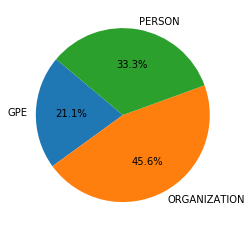

In [49]:
# from collections import defaultdict

# Create the defaultdict
ner_categories = defaultdict(int)

# Create the named entity chunks
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels
labels = list(ner_categories.keys())

# Create a list of the values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

### NER with SpaCy

spaCy is an open-source software library for advanced Natural Language Processing, written in the programming languages Python and Cython. The library is published under the MIT license and currently offers statistical neural network models for English, German, Spanish, Portuguese, French, Italian, Dutch and multi-language NER, as well as tokenization for various other languages. 

Unlike NLTK, which is widely used for teaching and research, spaCy focuses on providing software for production usage. spaCy also supports deep learning workflows that allow connecting statistical models trained by popular machine learning libraries like TensorFlow, Keras, Scikit-learn or PyTorch. [source](https://en.wikipedia.org/wiki/SpaCy)

NLP library similar to `gensim`, with different implementations. It focuses on creating NLP pipelines to generate models and corpora.

`$ conda install -c conda-forge spacy`

`$ python -m spacy download en`

In [50]:
# import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG AI
ORG AI
WORK_OF_ART Tesler's Theorem
PERSON Artificial
CARDINAL three
DATE 1956
DATE the years
ORG AI
ORG AI
ORG AI
DATE the twenty-first century
PERSON Mary Shelley's
PERSON Frankenstein
PERSON Karel Čapek's
PERSON R.U.R.
PERSON Rossum
ORG Universal Robots
PERSON Alan Turing's
CARDINAL 1
ORDINAL first
PERSON McCullouch
PERSON Pitts
DATE 1943
ORG Dartmouth College
DATE 1956
PERSON Attendees Allen Newell
ORG CMU
PERSON Herbert Simon
ORG CMU
PERSON John McCarthy
ORG MIT
PERSON Marvin Minsky
ORG MIT
PERSON Arthur Samuel
ORG IBM
DATE 1954
DATE 1959
ORG Logic Theorist
ORDINAL first
DATE 1956
LANGUAGE English
DATE the middle of the 1960s
GPE U.S.
ORG the Department of Defense
PERSON Herbert Simon
DATE twenty years
PERSON Marvin Minsky
DATE 1974
PERSON James Lighthill
GPE US
ORG Congress
GPE U.S.
NORP British
ORG AI
DATE The next few years
DATE the early 1980s
DATE 1985
ORG AI
MONEY over a billion dollars
GPE Japan
ORDINAL fifth
GPE U.S
NORP British
DATE 1987
ORDINAL second
DATE the lat

`spaCy` uses some extra NER Categories compared to `nltk` in its named-entity recognition. These include NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE and EVENT.

### NER with `polyglot` (Multilingual)

`polyglot` is another NLP library which uses word vectors like `gensim` or `spaCy`. The main advantage of `polyglot` is that it uses vectors for more than 130 languages. 
> Polyglot is a natural language pipeline that supports massive multilingual applications.

In [ ]:
from polyglot.text import Text

with open("articles/article-turkish.txt", 'r') as file:
    article = file.read()

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))

In [ ]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

In [ ]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if 'Márquez' in ent or "Gabo" in ent:
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)